In [1]:
pip install autoviml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 5.2 MB/s 
     |████████████████████████████████| 268 kB 40.5 MB/s 
     |████████████████████████████████| 76.6 MB 24 kB/s 
     |████████████████████████████████| 575 kB 63.6 MB/s 
     |████████████████████████████████| 125 kB 78.2 MB/s 
     |████████████████████████████████| 193.6 MB 81 kB/s 
     |████████████████████████████████| 240 kB 86.4 MB/s 
     |████████████████████████████████| 9.4 MB 63.2 MB/s 
     |████████████████████████████████| 965 kB 75.6 MB/s 
     |████████████████████████████████| 295 kB 79.8 MB/s 
     |████████████████████████████████| 1.6 MB 64.4 MB/s 
     |████████████████████████████████| 121 kB 83.4 MB/s 
     |████████████████████████████████| 83 kB 2.9 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=b8f41592fc5c9722540bd5dae5fea21872d6c96e1cd67652c5848a1384a541a0
  

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bodyPerformance.csv to bodyPerformance.csv


In [3]:
df = pd.read_csv('bodyPerformance.csv')

In [4]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [5]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.710. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


==================== System Information ====================
System: Linux
Node Name: 9ca64bc877e2
Release: 5.10.133+
Version: #1 SMP Fri Aug 26 08:44:51 UTC 2022
Machine: x86_64
Processor: x86_64
====================== CPU Information ======================
Physical cores: 1
Total cores: 2
==================== Memory Information ====================
Total: 12.68GB
Available: 11.59GB
Used: 877.57MB
================== System Information End ==================
##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (13393, 12)
    Training Set Memory Usage = 1.23 MB
Single_Label Target: ['class']
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
ALERT! Setting Imbalanced_Flag to True in Auto_ViML for Multi_Classification problems improves results!
      

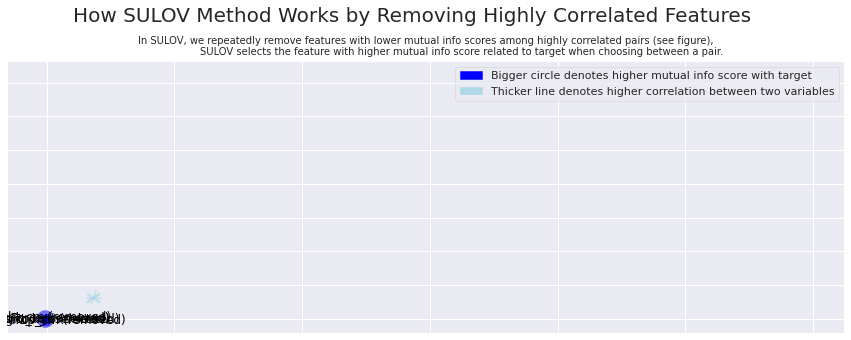

Splitting selected features into float and categorical (integer) variables:
    (6) float variables ...
    (2) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 8 
    Finding Important Features using Boosted Trees algorithm...
        using 8 variables...
        using 6 variables...
        using 4 variables...
        using 2 variables...
Found 8 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  10714 , CV rows =  2679
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling of train and validation data
#####

In [ ]:
model, features, trainm, testm = Auto_ViML(
    train = df,
    target = 'class',
    hyper_param="RS",#RS is 3X faster than Grid Search CV
    feature_reduction=True,#selects most important predictor variables
    Boosting_Flag=False,#Used for boosting
    Binning_Flag=False,#can be set to True when we want to convert the top numeric variables into binned variables
    Imbalanced_Flag=True,#if set to TRUE and will remove data imbalance using SMOTING technique
    verbose=3,#used to print the steps that are performed
)